<a href="https://colab.research.google.com/github/lgcaobianco/udacityMLE/blob/master/p02m03_grid_search_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#First imports

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Useful functions
##Function to plot data

In [0]:
#Used to plot data in csv
def plot_points(X,y):
  plt.scatter(X[np.argwhere(y==0).flatten(),0], X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
  plt.scatter(X[np.argwhere(y==1).flatten(),0], X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')

  plt.xlim(-2.05,2.05)
  plt.ylim(-2.05,2.05)
  plt.grid(False)
  plt.tick_params(
      axis='x',
      which='both',
      bottom=False,
      top=False)
  plt.show()

##Function to plot the model

In [0]:
#Used to plot the resulting model
def plot_model(X, y, clf):
    plt.scatter(X[np.argwhere(y==0).flatten(),0],X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
    plt.scatter(X[np.argwhere(y==1).flatten(),0],X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')

    plt.xlim(-2.05,2.05)
    plt.ylim(-2.05,2.05)
    plt.grid(False)
    plt.tick_params(
        axis='x',
        which=False,
        bottom=False,
        top=False)

    r = np.linspace(-2.1,2.1,300)
    s,t = np.meshgrid(r,r)
    s = np.reshape(s,(np.size(s),1))
    t = np.reshape(t,(np.size(t),1))
    h = np.concatenate((s,t),1)

    z = clf.predict(h)

    s = s.reshape((np.size(r),np.size(r)))
    t = t.reshape((np.size(r),np.size(r)))
    z = z.reshape((np.size(r),np.size(r)))

    plt.contourf(s,t,z,colors = ['blue','red'],alpha = 0.2,levels = range(-1,2))
    if len(np.unique(z)) > 1:
        plt.contour(s,t,z,colors = 'k', linewidths = 2)
    plt.show()

#Model Creation and Improvement

##Plotting data

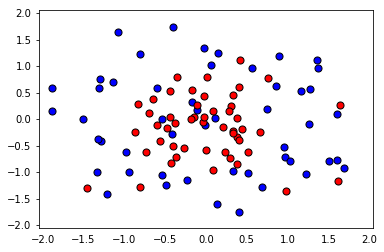

In [261]:
data = np.asarray(pd.read_csv("/home/lgcaobianco/repositorios/courses/udacity-MLE/grid-search-lab/data.csv", header=None))
X = data[:,0:2]
y = data[:, 2]
plot_points(X,y)

##Splitting data
data needs to be split into train, validation and test

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

##Initial model
After the data is split, we can assess the ```f1score``` of the initial model.

Accuracy on train was: 100.0%.
F1 score on train was: 100.0%.
Accuracy on validation was: 75.0%.
F1 score on validation was: 71.42857142857143%.


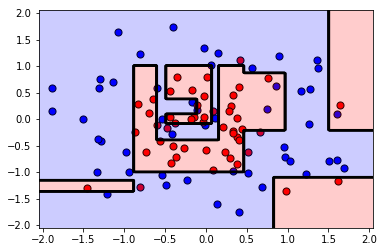

In [263]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

classifier = DecisionTreeClassifier(random_state = 42)
classifier.fit(X_train,y_train)
y_train_pred = classifier.predict(X_train)
y_val_pred = classifier.predict(X_val)

print("Accuracy on train was: "+ str(accuracy_score(y_train, y_train_pred)*100)+"%.")
print("F1 score on train was: "+ str(f1_score(y_train,y_train_pred)*100) + "%.")

print("Accuracy on validation was: "+ str(accuracy_score(y_val, y_val_pred)*100)+"%.")
print("F1 score on validation was: "+ str(f1_score(y_val,y_val_pred)*100) + "%.")
plot_model(X,y, classifier)

The big difference between f1score on test and validation indicates that model is overfitting.

##Improving the model using ```GridSearchCV```

Accuracy on train was: 87.5%.
F1 score on train was: 87.87878787878789%.
Accuracy on validation was: 93.75%.
F1 score on validation was: 93.33333333333333%.


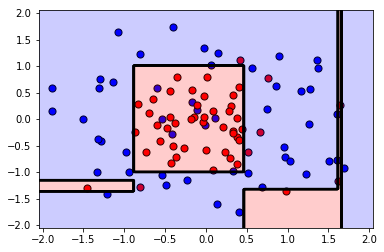

In [264]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

classifier = DecisionTreeClassifier(random_state=42)
parameters = {'max_depth':[1,2,4,6,8,10], 'min_samples_leaf':[1,2,4,6,8,10], 
              'min_samples_split':[2,4,6,8,10]}
scorer = make_scorer(f1_score)
grid_obj = GridSearchCV(classifier, parameters, scoring = scorer)
best_fit = grid_obj.fit(X_train, y_train).best_estimator_

best_train_prediction = best_fit.predict(X_train)
best_val_prediction = best_fit.predict(X_val)

print("Accuracy on train was: "+ str(accuracy_score(y_train, best_train_prediction)*100)+"%.")
print("F1 score on train was: "+ str(f1_score(y_train,best_train_prediction)*100) + "%.")

print("Accuracy on validation was: "+ str(accuracy_score(y_val, best_val_prediction)*100)+"%.")
print("F1 score on validation was: "+ str(f1_score(y_val,best_val_prediction)*100) + "%.")

plot_model(X=X,y=y, clf=best_fit)

As it can be seen, the model now has a smaller difference between the training and validation set, and both scores are high. Therefore the model has been improved, and its score on the test set may be evaluated.

##Testing best model

In [265]:
y_test_best_predict = best_fit.predict(X_test)
print("Accuracy on test was: "+ str(accuracy_score(y_test, y_test_best_predict)*100)+"%.")
print("F1 score on test was: "+ str(f1_score(y_test,y_test_best_predict)*100) + "%.")

Accuracy on test was: 80.0%.
F1 score on test was: 81.81818181818183%.


#Conclusion
The scorer chosen here was ```f1score``` and it was used to assess a ```DecisionTreeClassifier```.  Accuracy was shown only as a metric, and it was not used as a *criterium* to decide between topologies of the tree in analysis. 

It is show that through the **Grid Search Method** it is possible to find the best classifier. The data was split into three different sets: *train*, *validation* and *test*. The test data are only used *after* the best classifier is found, and therefore none decisions are made using this set of information.



#Bonus

As a plus, the same process will take place with different classifiers. This is done in order to practice the concepts and methods here used.

##Multilayer Perceptron
### finding best topology

In [0]:
from sklearn.neural_network import MLPClassifier

mlpClassifier = MLPClassifier()
parametersMLP = {'hidden_layer_sizes': [5, 10, 15, 20, 50, [5, 10], [5, 10, 10, 15], [20, 50, 100]], 'activation': ['logistic','tanh']}
scorer = make_scorer(accuracy_score)
grid_obj_mlp = GridSearchCV(mlpClassifier, parametersMLP, scoring = scorer)
best_mlp = grid_obj_mlp.fit(X_train, y_train).best_estimator_

###Testing best fit on validation and training test

F1 score on train was: 0.8181818181818182
F1 score on validation was: 0.8181818181818182
0.75


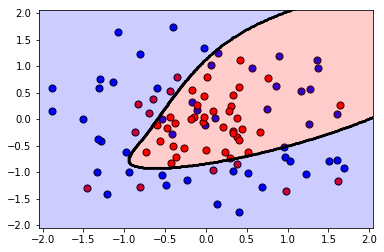

In [267]:
prd_mlp_train = best_mlp.predict(X_train)
prd_mlp_validation = best_mlp.predict(X_val)

print("F1 score on train was: "+ str(f1_score(y_test,y_test_best_predict)))
print("F1 score on validation was: "+ str(f1_score(y_test,y_test_best_predict)))

prd_mlp_test = best_mlp.predict(X_test)
print(accuracy_score(y_test, prd_mlp_test))
plot_model(X, y, best_mlp)

##Support Vector Machines

###create grid svc object

In [0]:
from sklearn.svm import SVC

svc = SVC()
parametersSVC = {'kernel': ['linear', 'rbf']}
scorer = make_scorer(accuracy_score)
gridSVC = GridSearchCV(svc, parametersSVC, scoring = scorer)
best_svc = gridSVC.fit(X_train, y_train).best_estimator_


###assessing scores of SVC

In [269]:
print("The accuracy on train was: " + str(accuracy_score(y_train, best_svc.predict(X_train))) +" %.")
print("The accuracy on validation was: " + str(accuracy_score(y_val, best_svc.predict(X_val))) +" %.")
print("The accuracy on validation was: " + str(accuracy_score(y_test, best_svc.predict(X_test))) +" %.")

The accuracy on train was: 0.765625 %.
The accuracy on validation was: 0.8125 %.
The accuracy on validation was: 0.9 %.


With a high accuracy, we can check the plot of the new model
### model of best SVC

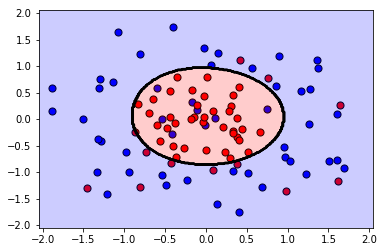

In [270]:
plot_model(X,y,  best_svc)